Name: Tarun Tanmay

Class: MBATech CE

Sem: 6

Roll No: N049

SAP ID: 70471018055

---



In [ ]:
#Experiment 7
#CNN for large database of images

In [ ]:
#This code is used to mount the drive on the colab notebook through code as everytime you leave the notebook, 
#you will have to mount it again.
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path1='/content/drive/My Drive/v_data/train'
path2='/content/drive/My Drive/v_data/test'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as bck

In [ ]:
width,height=224,224
train_data_dir=path1
validation_data_dir=path2

In [ ]:
train_samples=400
validation_samples=100
no_epochs=10

In [ ]:
#This code it used to specify whether the number of channels (RGB planes) is coming first or last.
if bck.image_data_format()=='channels_first':
  input_sh=(3,width,height)
else:
  input_sh=(width,height,3)

In [ ]:
model=Sequential()
#First convolutional layer
model.add(Conv2D(32, (2,2), input_shape=input_sh))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Second convolutional layer
model.add(Conv2D(32, (2,2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Third convolutional layer
model.add(Conv2D(64, (2,2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])


In [ ]:
#Augmenting the dataset i.e. creating new images by working on the given images to create more samples and prevent overfitting
#shear means shrinking in one direction and elongating in another
#zoom here is zooming the image
#horizontal flip means flipping the image horizontally
#Images normalised by dividing all of them by 255
#Randomly a few images will under go this augmentation. Not all images are augmented.

train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_data=ImageDataGenerator(rescale=1./255)

In [ ]:
train_set=train_data.flow_from_directory(train_data_dir, target_size=(width,height), batch_size=16,class_mode='binary')
validation_set=test_data.flow_from_directory(validation_data_dir, target_size=(width,height), batch_size=16, class_mode='binary')

Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
#As we are using augmented data set and flow from directory, we use model.fit_generator
#no labels
#400 models are exhausted in number of iterations 16 at a time
model.fit_generator(train_set, steps_per_epoch=train_samples//16, epochs=no_epochs, validation_data=validation_set)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
25/25 [==============================] - 5s 195ms/step - loss: 1.0676 - accuracy: 0.5601 - val_loss: 0.3891 - val_accuracy: 0.9500
Epoch 2/10
25/25 [==============================] - 5s 189ms/step - loss: 0.5460 - accuracy: 0.7445 - val_loss: 0.2987 - val_accuracy: 0.9100
Epoch 3/10
25/25 [==============================] - 5s 189ms/step - loss: 0.4489 - accuracy: 0.7954 - val_loss: 0.2507 - val_accuracy: 0.9000
Epoch 4/10
25/25 [==============================] - 5s 190ms/step - loss: 0.4452 - accuracy: 0.8281 - val_loss: 0.3068 - val_accuracy: 0.9000
Epoch 5/10
25/25 [==============================] - 5s 191ms/step - loss: 0.3168 - accuracy: 0.8729 - val_loss: 0.2948 - val_accuracy: 0.8800
Epoch 6/10
25/25 [==============================] - 5s 191ms/step - loss: 0.2598 - accuracy: 0.9109 - val_loss: 0.2744 - val_accuracy: 0.8900
Epoch 7/10
25/25 [==============================] - 5s 189ms/step - loss: 0.4147 - accuracy: 0.8505 - val_loss: 0.3279 - val_accuracy: 0.8300
Epoch 

In [ ]:
model.save('adv_cnn.h5')

In [ ]:
from keras.models import load_model
model=load_model('adv_cnn.h5')

In [ ]:
predict=model.predict_classes(validation_set)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
# here class '0' is car, '1' is plane
predict[1]

array([0], dtype=int32)

In [ ]:
train_set.class_indices

{'cars': 0, 'planes': 1}

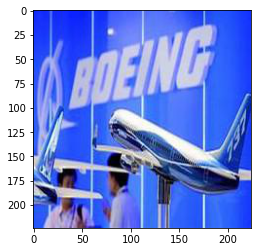

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(validation_set[0][0][1])